# Unit 3 - Lesson 3 - Challenge - Advanced Regression

In [1]:
# Import modules
import math
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn import preprocessing as preproc
from sklearn.preprocessing import MinMaxScaler as mms
%matplotlib inline
sns.set_style('white')

In [2]:
# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Store filename in variable
offenses = 'Table_8_Offenses_Known_to_Law_Enforcement_by_State_by_City_2013.csv'

# Build DataFrame from file and trim the first three (3) rows
df = pd.read_csv(offenses, skiprows=3)

In [4]:
df.head()

,State,City,Population,Violent crime,Murder and nonnegligent manslaughter,Rape (revised definition)1,Rape (legacy definition)2,Robbery,Aggravated assault,Property crime,Burglary,Larceny- theft,Motor vehicle theft,Arson3,Unnamed: 14,Unnamed: 15,Unnamed: 16
0,ALABAMA,Abbeville,"2,645",11,1.0,1,NaN,2,7,63,21,39,3,NaN,NaN,NaN,NaN
1,NaN,Adamsville,"4,481",19,1.0,0,NaN,7,11,321,58,252,11,NaN,NaN,NaN,
2,NaN,Addison,744,1,0.0,1,NaN,0,0,25,6,17,2,NaN,NaN,NaN,
3,NaN,Alabaster,"31,170",44,0.0,2,NaN,11,31,640,70,544,26,NaN,NaN,NaN,NaN
4,NaN,Alexander City,"14,692",119,2.0,16,NaN,12,89,661,121,510,30,NaN,NaN,NaN,NaN


In [5]:
df.tail()

,State,City,Population,Violent crime,Murder and nonnegligent manslaughter,Rape (revised definition)1,Rape (legacy definition)2,Robbery,Aggravated assault,Property crime,Burglary,Larceny- theft,Motor vehicle theft,Arson3,Unnamed: 14,Unnamed: 15,Unnamed: 16
9297,6 Because of changes in the state/local agency...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9298,7 The FBI determined that the agency's data we...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9299,8 The data collection methodology for the offe...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9300,9 This agency began the year submitting rape d...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9301,10 The FBI determined that the agency did not ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
# Trim rows at the end that do not contain quantitative data
df = df[:9292]

In [7]:
df.tail()

,State,City,Population,Violent crime,Murder and nonnegligent manslaughter,Rape (revised definition)1,Rape (legacy definition)2,Robbery,Aggravated assault,Property crime,Burglary,Larceny- theft,Motor vehicle theft,Arson3,Unnamed: 14,Unnamed: 15,Unnamed: 16
9287,NaN,Sundance,"1,221",0,0.0,NaN,0,0,0,11,2,7,2,0,NaN,NaN,NaN
9288,NaN,Thermopolis,"3,023",2,0.0,NaN,0,0,2,71,14,54,3,0,NaN,NaN,NaN
9289,NaN,Torrington,"6,797",18,0.0,NaN,1,0,17,121,33,85,3,0,NaN,NaN,NaN
9290,NaN,Wheatland,"3,644",11,0.0,NaN,0,0,11,114,21,85,8,0,NaN,NaN,NaN
9291,NaN,Worland,"5,441",7,0.0,NaN,0,0,7,47,2,45,0,0,NaN,NaN,NaN


In [8]:
# Columns with numerical data do not appear to be consistently formatted by type
df.dtypes

State                                      object
City                                       object
Population                                 object
Violent\ncrime                             object
Murder and\nnonnegligent\nmanslaughter    float64
Rape\n(revised\ndefinition)1               object
Rape\n(legacy\ndefinition)2                object
Robbery                                    object
Aggravated\nassault                        object
Property\ncrime                            object
Burglary                                   object
Larceny-\ntheft                            object
Motor\nvehicle\ntheft                      object
Arson3                                     object
Unnamed: 14                               float64
Unnamed: 15                               float64
Unnamed: 16                                object
dtype: object

### Clean the data

In [9]:
# Rename some columns for brevity
df = df.rename(columns={'State': 'ST',
                        'Violent\ncrime': 'Violent_crime', 
                        'Murder and\nnonnegligent\nmanslaughter': 'Murder_Mansl',
                        'Rape\n(revised\ndefinition)1': 'Rape_def_1',
                        'Rape\n(legacy\ndefinition)2': 'Rape_def_2',
                        'Aggravated\nassault': 'Agg_assault',
                        'Property\ncrime': 'Prop_crime',
                        'Larceny-\ntheft': 'Larceny_theft',
                        'Motor\nvehicle\ntheft': 'Mot_vehicle_theft',
                        'Arson3': 'Arson'})

In [10]:
# Ensure numerical data is treated as such
def floatify(x):
    try:
        if ',' in str(x):
            x = x.replace(',', '')
        x = float(x)
    except ValueError:
        x = None
    return x

In [11]:
# Apply 'floatify' function to columns with numerical data
for col in df.columns:
    if col != 'ST' and col != 'City':
        df[col] = df[col].apply(floatify)

In [12]:
# Fill null entries in the 'ST' column with the correct state name
def state_names(states):    
    cur = None
    states_cleaned = []
    for st in states:
        if isinstance(st, str):
            cur = st
            states_cleaned.append(cur)
        else:
            st = cur
            states_cleaned.append(st)
    return states_cleaned

In [13]:
# Replace 'ST' column with results from 'state_names' function
df['ST'] = state_names(list(df['ST']))

In [14]:
# Combine data from similar columns into one column
df['Rape'] = df[['Rape_def_1','Rape_def_2']].max(axis=1)

In [15]:
# Re-order columns in the dataframe
df = df[['ST','City','Population',
         'Violent_crime','Murder_Mansl','Rape','Robbery','Agg_assault',
         'Prop_crime','Burglary','Larceny_theft','Mot_vehicle_theft','Arson']]

In [16]:
# View summary info and data types for dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9292 entries, 0 to 9291
Data columns (total 13 columns):
ST                   9292 non-null object
City                 9292 non-null object
Population           9289 non-null float64
Violent_crime        9288 non-null float64
Murder_Mansl         9292 non-null float64
Rape                 9290 non-null float64
Robbery              9292 non-null float64
Agg_assault          9289 non-null float64
Prop_crime           9288 non-null float64
Burglary             9290 non-null float64
Larceny_theft        9290 non-null float64
Mot_vehicle_theft    9292 non-null float64
Arson                8819 non-null float64
dtypes: float64(11), object(2)
memory usage: 943.8+ KB


In [17]:
# Remove 'Arson' column - too many null values
df = df[df.columns[:-1]]

# Drop remaining rows where columns contain null values
df = df.dropna()

# View summary info and data types for cleaned dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9281 entries, 0 to 9291
Data columns (total 12 columns):
ST                   9281 non-null object
City                 9281 non-null object
Population           9281 non-null float64
Violent_crime        9281 non-null float64
Murder_Mansl         9281 non-null float64
Rape                 9281 non-null float64
Robbery              9281 non-null float64
Agg_assault          9281 non-null float64
Prop_crime           9281 non-null float64
Burglary             9281 non-null float64
Larceny_theft        9281 non-null float64
Mot_vehicle_theft    9281 non-null float64
dtypes: float64(10), object(2)
memory usage: 942.6+ KB


In [18]:
# Summary statistics for cleaned dataframe
df.describe()

,Population,Violent_crime,Murder_Mansl,Rape,Robbery,Agg_assault,Prop_crime,Burglary,Larceny_theft,Mot_vehicle_theft
count,9.281000e+03,9281.000000,9281.000000,9281.000000,9281.000000,9281.000000,9281.000000,9281.000000,9281.000000,9281.000000
mean,2.110331e+04,92.489387,1.056459,6.877815,29.642926,54.912186,661.109471,137.208490,468.378838,55.522142
std,1.156704e+05,781.696708,8.893021,35.232035,304.843533,448.872847,3294.357137,683.578162,2316.672080,392.409527
min,5.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.317000e+03,2.000000,0.000000,0.000000,0.000000,2.000000,36.000000,7.000000,25.000000,1.000000
50%,5.894000e+03,10.000000,0.000000,1.000000,1.000000,6.000000,118.000000,22.000000,87.000000,4.000000
75%,1.626700e+04,35.000000,0.000000,4.000000,7.000000,22.000000,419.000000,75.000000,321.000000,16.000000
max,8.396126e+06,52384.000000,335.000000,1279.000000,19170.000000,31767.000000,141971.000000,23733.000000,117931.000000,14382.000000


In [19]:
# Preview cleaned dataframe
df.head()

,ST,City,Population,Violent_crime,Murder_Mansl,Rape,Robbery,Agg_assault,Prop_crime,Burglary,Larceny_theft,Mot_vehicle_theft
0,ALABAMA,Abbeville,2645.0,11.0,1.0,1.0,2.0,7.0,63.0,21.0,39.0,3.0
1,ALABAMA,Adamsville,4481.0,19.0,1.0,0.0,7.0,11.0,321.0,58.0,252.0,11.0
2,ALABAMA,Addison,744.0,1.0,0.0,1.0,0.0,0.0,25.0,6.0,17.0,2.0
3,ALABAMA,Alabaster,31170.0,44.0,0.0,2.0,11.0,31.0,640.0,70.0,544.0,26.0
4,ALABAMA,Alexander City,14692.0,119.0,2.0,16.0,12.0,89.0,661.0,121.0,510.0,30.0


### Exploratory Data Analysis

In [20]:
sns.set_style('darkgrid')

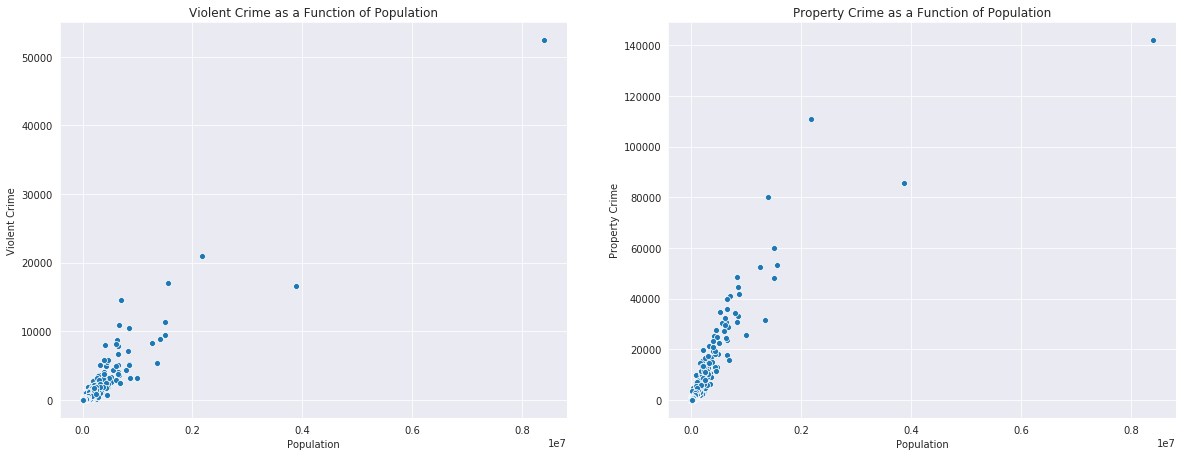

In [21]:
fig = plt.figure(figsize=(20,16))

fig.add_subplot(221)
sns.scatterplot(x='Population', y='Violent_crime', data=df)
plt.title('Violent Crime as a Function of Population')
plt.xlabel('Population')
plt.ylabel('Violent Crime')

fig.add_subplot(222)
sns.scatterplot(x='Population', y='Prop_crime', data=df)
plt.title('Property Crime as a Function of Population')
plt.xlabel('Population')
plt.ylabel('Property Crime')
plt.show()

In [22]:
# Build a subset of the dataframe for cities with less than 250,000 people
df_lt_250k = df[df['Population'] < 250000]

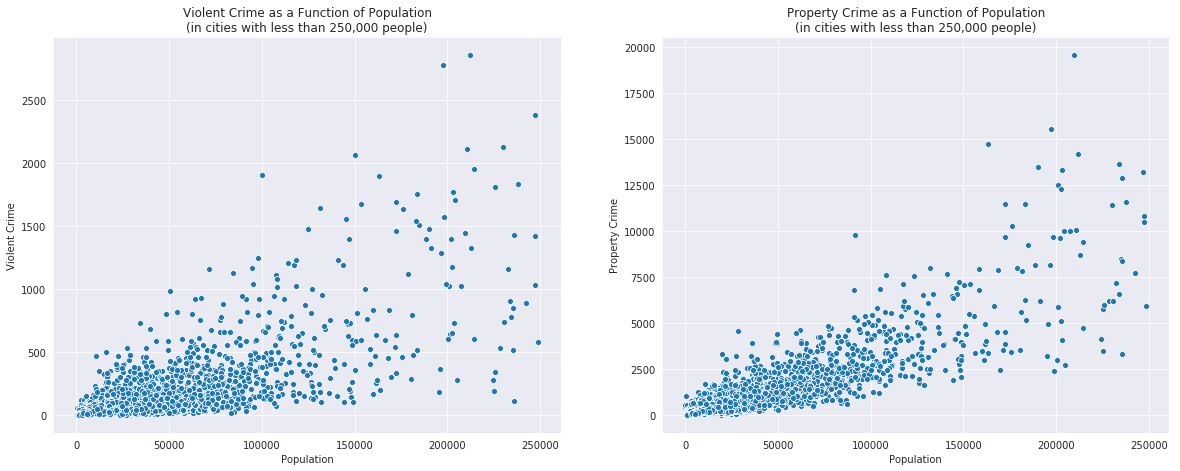

In [23]:
fig = plt.figure(figsize=(20,16))

fig.add_subplot(221)
sns.scatterplot(x='Population', y='Violent_crime', data=df_lt_250k)
plt.title('Violent Crime as a Function of Population\n(in cities with less than 250,000 people)')
plt.xlabel('Population')
plt.ylabel('Violent Crime')

fig.add_subplot(222)
sns.scatterplot(x='Population', y='Prop_crime', data=df_lt_250k)
plt.title('Property Crime as a Function of Population\n(in cities with less than 250,000 people)')
plt.xlabel('Population')
plt.ylabel('Property Crime')
plt.show()

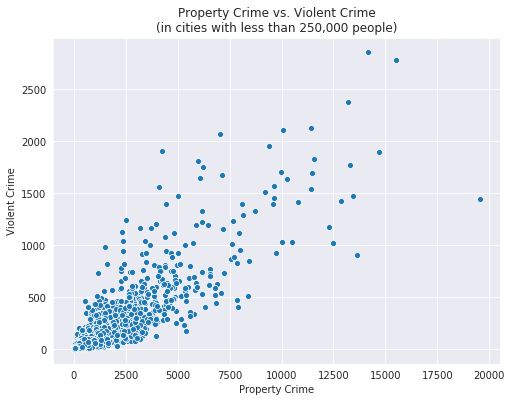

In [64]:
fig = plt.figure(figsize=(8,6))

sns.scatterplot(x='Prop_crime', y='Violent_crime', data=df_lt_250k)
plt.title('Property Crime vs. Violent Crime\n(in cities with less than 250,000 people)')
plt.xlabel('Property Crime')
plt.ylabel('Violent Crime')
plt.show()

In [26]:
df_lt_250k.head()

,ST,City,Population,Violent_crime,Murder_Mansl,Rape,Robbery,Agg_assault,Prop_crime,Burglary,Larceny_theft,Mot_vehicle_theft
0,ALABAMA,Abbeville,2645.0,11.0,1.0,1.0,2.0,7.0,63.0,21.0,39.0,3.0
1,ALABAMA,Adamsville,4481.0,19.0,1.0,0.0,7.0,11.0,321.0,58.0,252.0,11.0
2,ALABAMA,Addison,744.0,1.0,0.0,1.0,0.0,0.0,25.0,6.0,17.0,2.0
3,ALABAMA,Alabaster,31170.0,44.0,0.0,2.0,11.0,31.0,640.0,70.0,544.0,26.0
4,ALABAMA,Alexander City,14692.0,119.0,2.0,16.0,12.0,89.0,661.0,121.0,510.0,30.0


In [27]:
# https://en.wikipedia.org/wiki/List_of_regions_of_the_United_States#Standard_federal_regions
std_federal_regions = {
    'Region_I': ['Connecticut', 'Maine', 'Massachusetts', 'New Hampshire', 'Rhode Island', 'Vermont'],
    'Region_II': ['New Jersey', 'New York', 'Puerto Rico', 'US Virgin Islands'],
    'Region_III': ['Delaware', 'District of Columbia', 'Maryland', 'Pennsylvania', 'Virginia', 'West Virginia'],
    'Region_IV': ['Alabama', 'Florida', 'Georgia', 'Kentucky', 'Mississippi', 'North Carolina', 'South Carolina', 'Tennessee'],
    'Region_V': ['Illinois', 'Indiana', 'Michigan', 'Minnesota', 'Ohio', 'Wisconsin'],
    'Region_VI': ['Arkansas', 'Louisiana', 'New Mexico', 'Oklahoma', 'Texas'],
    'Region_VII': ['Iowa', 'Kansas', 'Missouri', 'Nebraska'],
    'Region_VIII': ['Colorado', 'Montana', 'North Dakota', 'South Dakota', 'Utah', 'Wyoming'],
    'Region_IX': ['Arizona', 'California', 'Hawaii', 'Nevada', 'American Samoa', 'Guam', 'Northern Mariana Islands'],
    'Region_X': ['Alaska', 'Idaho', 'Oregon', 'Washington']
}

In [28]:
df_lt_250k['ST'].unique()

array(['ALABAMA', 'ALASKA', 'ARIZONA', 'ARKANSAS', 'CALIFORNIA',
       'COLORADO', 'CONNECTICUT', 'DELAWARE', 'FLORIDA', 'GEORGIA',
       'IDAHO', 'ILLINOIS', 'INDIANA', 'IOWA', 'KANSAS', 'KENTUCKY',
       'LOUISIANA', 'MAINE', 'MARYLAND', 'MASSACHUSETTS', 'MICHIGAN',
       'MINNESOTA', 'MISSISSIPPI', 'MISSOURI', 'MONTANA', 'NEBRASKA',
       'NEVADA', 'NEW HAMPSHIRE', 'NEW JERSEY', 'NEW MEXICO', 'NEW YORK',
       'NORTH CAROLINA', 'NORTH DAKOTA', 'OHIO', 'OKLAHOMA', 'OREGON',
       'PENNSYLVANIA', 'RHODE ISLAND', 'SOUTH CAROLINA', 'SOUTH DAKOTA',
       'TENNESSEE', 'TEXAS', 'UTAH', 'VERMONT', 'VIRGINIA', 'WASHINGTON',
       'WEST VIRGINIA', 'WISCONSIN', 'WYOMING'], dtype=object)

In [29]:
df_lt_250k.head()

,ST,City,Population,Violent_crime,Murder_Mansl,Rape,Robbery,Agg_assault,Prop_crime,Burglary,Larceny_theft,Mot_vehicle_theft
0,ALABAMA,Abbeville,2645.0,11.0,1.0,1.0,2.0,7.0,63.0,21.0,39.0,3.0
1,ALABAMA,Adamsville,4481.0,19.0,1.0,0.0,7.0,11.0,321.0,58.0,252.0,11.0
2,ALABAMA,Addison,744.0,1.0,0.0,1.0,0.0,0.0,25.0,6.0,17.0,2.0
3,ALABAMA,Alabaster,31170.0,44.0,0.0,2.0,11.0,31.0,640.0,70.0,544.0,26.0
4,ALABAMA,Alexander City,14692.0,119.0,2.0,16.0,12.0,89.0,661.0,121.0,510.0,30.0


In [30]:
def regions(st, d=std_federal_regions):
    for key, vals in d.items():
        if st.title() in vals:
            return key

In [31]:
df_lt_250k['Region'] = df['ST'].apply(regions)

In [32]:
df_lt_250k.columns

Index(['ST', 'City', 'Population', 'Violent_crime', 'Murder_Mansl', 'Rape',
       'Robbery', 'Agg_assault', 'Prop_crime', 'Burglary', 'Larceny_theft',
       'Mot_vehicle_theft', 'Region'],
      dtype='object')

### Build feature model dataframe

In [33]:
feats = pd.DataFrame()

In [34]:
feats = pd.concat([df_lt_250k, pd.get_dummies(df_lt_250k['Region']), pd.get_dummies(df_lt_250k['ST'])], axis=1)

In [35]:
feats['pop_lt_1k'] = np.where(feats['Population'] < 1000, 1, 0)
feats['pop_bw_1k_to_2.5k'] = np.where(((feats['Population'] >= 1000) & (feats['Population'] < 2500)), 1, 0)
feats['pop_bw_2.5k_to_5k'] = np.where(((feats['Population'] >= 2500) & (feats['Population'] < 5000)), 1, 0)
feats['pop_bw_5k_to_10k'] = np.where(((feats['Population'] >= 5000) & (feats['Population'] < 10000)), 1, 0)
feats['pop_bw_10k_to_25k'] = np.where(((feats['Population'] >= 10000) & (feats['Population'] < 25000)), 1, 0)
feats['pop_bw_25k_to_50k'] = np.where(((feats['Population'] >= 25000) & (feats['Population'] < 50000)), 1, 0)
feats['pop_bw_50k_to_100k'] = np.where(((feats['Population'] >= 50000) & (feats['Population'] < 100000)), 1, 0)
feats['pop_bw_100k_to_250k'] = np.where(((feats['Population'] >= 100000) & (feats['Population'] < 250000)), 1, 0)

In [36]:
feats['minmax_Agg_assault'] = preproc.minmax_scale(feats[['Agg_assault']])
feats['minmax_Larceny_theft'] = preproc.minmax_scale(feats[['Larceny_theft']])

In [37]:
feats['city_tot_cri'] = df_lt_250k['Violent_crime'] + df_lt_250k['Prop_crime']
feats['city_v_cri_pc'] = df_lt_250k['Violent_crime'] / df_lt_250k['Population']
feats['city_p_cri_pc'] = df_lt_250k['Prop_crime'] / df_lt_250k['Population']
feats['city_tot_cri_pc'] = feats['city_tot_cri'] / df_lt_250k['Population']

In [38]:
def v_cri_by_st(st, dframe=df_lt_250k):
    st_v_cri_pc = dframe[dframe['ST'] == st]['Violent_crime'].sum() / dframe[dframe['ST'] == st]['Population'].sum()
    return st_v_cri_pc

In [39]:
def p_cri_by_st(st, dframe=df_lt_250k):
    st_p_cri_pc = dframe[dframe['ST'] == st]['Prop_crime'].sum() / dframe[dframe['ST'] == st]['Population'].sum()
    return st_p_cri_pc

In [40]:
def tot_cri_by_st(st, dframe=df_lt_250k):
    st_tot_cri_pc = (dframe[dframe['ST'] == st]['Violent_crime'].sum() + 
                     dframe[dframe['ST'] == st]['Prop_crime'].sum()) / dframe[dframe['ST'] == st]['Population'].sum()
    return st_tot_cri_pc

In [41]:
def v_cri_by_reg(reg, dframe=df_lt_250k):
    reg_v_cri_pc = dframe[dframe['Region'] == reg]['Violent_crime'].sum() / dframe[dframe['Region'] == reg]['Population'].sum()
    return reg_v_cri_pc

In [42]:
def p_cri_by_reg(reg, dframe=df_lt_250k):
    reg_p_cri_pc = dframe[dframe['Region'] == reg]['Prop_crime'].sum() / dframe[dframe['Region'] == reg]['Population'].sum()
    return reg_p_cri_pc

In [43]:
def tot_cri_by_reg(reg, dframe=df_lt_250k):
    reg_tot_cri_pc = (dframe[dframe['Region'] == reg]['Violent_crime'].sum() + 
                      dframe[dframe['Region'] == reg]['Prop_crime'].sum()) / dframe[dframe['Region'] == reg]['Population'].sum()
    return reg_tot_cri_pc

In [44]:
feats['st_v_cri_pc'] = preproc.minmax_scale(df_lt_250k['ST'].apply(v_cri_by_st))
feats['st_p_cri_pc'] = preproc.minmax_scale(df_lt_250k['ST'].apply(p_cri_by_st))
feats['st_tot_cri_pc'] = preproc.minmax_scale(df_lt_250k['ST'].apply(tot_cri_by_st))
feats['reg_v_cri_pc'] = preproc.minmax_scale(df_lt_250k['Region'].apply(v_cri_by_reg))
feats['reg_p_cri_pc'] = preproc.minmax_scale(df_lt_250k['Region'].apply(p_cri_by_reg))
feats['reg_tot_cri_pc'] = preproc.minmax_scale(df_lt_250k['Region'].apply(tot_cri_by_reg))

In [46]:
feats['natl_v_cri_pc'] = df_lt_250k['Violent_crime'].sum() / df_lt_250k['Population'].sum()
feats['natl_p_cri_pc'] = df_lt_250k['Prop_crime'].sum() / df_lt_250k['Population'].sum()
feats['natl_tot_cri_pc'] = (df_lt_250k['Violent_crime'].sum() + df_lt_250k['Prop_crime'].sum()) / df_lt_250k['Population'].sum()

In [47]:
feats['st_v_cri_pc_gt_reg'] = np.where(feats['st_v_cri_pc'] > feats['reg_v_cri_pc'], 1, 0)
feats['st_p_cri_pc_gt_reg'] = np.where(feats['st_p_cri_pc'] > feats['reg_p_cri_pc'], 1, 0)
feats['st_tot_cri_pc_gt_reg'] = np.where(feats['st_tot_cri_pc'] > feats['reg_tot_cri_pc'], 1, 0)
feats['st_v_cri_pc_gt_natl'] = np.where(feats['st_v_cri_pc'] > feats['natl_v_cri_pc'], 1, 0)
feats['st_p_cri_pc_gt_natl'] = np.where(feats['st_p_cri_pc'] > feats['natl_p_cri_pc'], 1, 0)
feats['st_tot_cri_pc_gt_natl'] = np.where(feats['st_tot_cri_pc'] > feats['natl_tot_cri_pc'], 1, 0)
feats['reg_v_cri_pc_gt_natl'] = np.where(feats['reg_v_cri_pc'] > feats['natl_v_cri_pc'], 1, 0)
feats['reg_p_cri_pc_gt_natl'] = np.where(feats['reg_p_cri_pc'] > feats['natl_p_cri_pc'], 1, 0)
feats['reg_tot_cri_pc_gt_natl'] = np.where(feats['reg_tot_cri_pc'] > feats['natl_tot_cri_pc'], 1, 0)

In [48]:
feats['city_v_cri_pc_gt_natl'] = np.where(feats['city_v_cri_pc'] > feats['natl_v_cri_pc'], 1, 0)
feats['city_p_cri_pc_gt_natl'] = np.where(feats['city_p_cri_pc'] > feats['natl_p_cri_pc'], 1, 0)
feats['city_tot_cri_pc_gt_natl'] = np.where(feats['city_tot_cri_pc'] > feats['natl_tot_cri_pc'], 1, 0)

In [49]:
feats.shape

(9207, 107)

In [50]:
feats.head()

,ST,City,Population,Violent_crime,Murder_Mansl,Rape,Robbery,Agg_assault,Prop_crime,Burglary,...,st_tot_cri_pc_gt_reg,st_v_cri_pc_gt_natl,st_p_cri_pc_gt_natl,st_tot_cri_pc_gt_natl,reg_v_cri_pc_gt_natl,reg_p_cri_pc_gt_natl,reg_tot_cri_pc_gt_natl,city_v_cri_pc_gt_natl,city_p_cri_pc_gt_natl,city_tot_cri_pc_gt_natl
0,ALABAMA,Abbeville,2645.0,11.0,1.0,1.0,2.0,7.0,63.0,21.0,...,0,1,1,1,1,1,1,1,0,0
1,ALABAMA,Adamsville,4481.0,19.0,1.0,0.0,7.0,11.0,321.0,58.0,...,0,1,1,1,1,1,1,1,1,1
2,ALABAMA,Addison,744.0,1.0,0.0,1.0,0.0,0.0,25.0,6.0,...,0,1,1,1,1,1,1,0,1,1
3,ALABAMA,Alabaster,31170.0,44.0,0.0,2.0,11.0,31.0,640.0,70.0,...,0,1,1,1,1,1,1,0,0,0
4,ALABAMA,Alexander City,14692.0,119.0,2.0,16.0,12.0,89.0,661.0,121.0,...,0,1,1,1,1,1,1,1,1,1


### Create independent (X) & outcome (y) variables 

In [51]:
# Tweak feature model before evaluation:
X = feats.drop(['ST', 'City', 'Population', 'Region', 'Violent_crime', 'Murder_Mansl', 'Rape', 
                'Robbery', 'Agg_assault', 'Prop_crime', 'Burglary', 'Larceny_theft', 'Mot_vehicle_theft', 
                'city_tot_cri', 'city_v_cri_pc', 'city_p_cri_pc', 'city_tot_cri_pc', 
                'city_v_cri_pc_gt_natl', 'city_p_cri_pc_gt_natl','city_tot_cri_pc_gt_natl'], axis=1)
y = feats['city_tot_cri_pc_gt_natl']

In [52]:
X.columns

Index(['Region_I', 'Region_II', 'Region_III', 'Region_IV', 'Region_IX',
       'Region_V', 'Region_VI', 'Region_VII', 'Region_VIII', 'Region_X',
       'ALABAMA', 'ALASKA', 'ARIZONA', 'ARKANSAS', 'CALIFORNIA', 'COLORADO',
       'CONNECTICUT', 'DELAWARE', 'FLORIDA', 'GEORGIA', 'IDAHO', 'ILLINOIS',
       'INDIANA', 'IOWA', 'KANSAS', 'KENTUCKY', 'LOUISIANA', 'MAINE',
       'MARYLAND', 'MASSACHUSETTS', 'MICHIGAN', 'MINNESOTA', 'MISSISSIPPI',
       'MISSOURI', 'MONTANA', 'NEBRASKA', 'NEVADA', 'NEW HAMPSHIRE',
       'NEW JERSEY', 'NEW MEXICO', 'NEW YORK', 'NORTH CAROLINA',
       'NORTH DAKOTA', 'OHIO', 'OKLAHOMA', 'OREGON', 'PENNSYLVANIA',
       'RHODE ISLAND', 'SOUTH CAROLINA', 'SOUTH DAKOTA', 'TENNESSEE', 'TEXAS',
       'UTAH', 'VERMONT', 'VIRGINIA', 'WASHINGTON', 'WEST VIRGINIA',
       'WISCONSIN', 'WYOMING', 'pop_lt_1k', 'pop_bw_1k_to_2.5k',
       'pop_bw_2.5k_to_5k', 'pop_bw_5k_to_10k', 'pop_bw_10k_to_25k',
       'pop_bw_25k_to_50k', 'pop_bw_50k_to_100k', 'pop_bw_100k_to_250k

### Advanced Regression

For cities with fewer than 250,000 people, based on:
 - a city's population, 
 - the state a city is in, 
 - the state's federal region,
 - and other features...
 
Can we predict whether a city's total crime statistics per capita will be greater than or equal to the national total crime per capita for cities in the dataset?

### Vanilla Logistic Regression

In [53]:
# Declare a logistic regression classifier
log_reg = LogisticRegression()

# Fit the model.
log_reg_fit = log_reg.fit(X, y)

# Display.
print('Coefficients')
print(log_reg_fit.coef_)
print(log_reg_fit.intercept_)
pred_y_sklearn = log_reg.predict(X)

print('\n Accuracy by admission status')
print(pd.crosstab(pred_y_sklearn, y))

print('\n Percentage accuracy')
print(log_reg.score(X, y))

Coefficients
[[-5.72175989e-01 -6.21321233e-01  2.31813612e-01  2.19753288e-01
   1.70765420e-01  1.00551842e-01 -1.32124729e-01 -1.91304053e-01
  -1.22872940e-01  5.38326209e-02  5.60837274e-02  4.26899221e-01
   1.08450011e-01  4.50278369e-03 -4.15458345e-02  4.58596233e-01
  -8.42995747e-01  4.99412802e-01 -1.82410916e-01  8.83456419e-02
  -2.73932033e-01  7.22515417e-02  3.98069172e-01 -3.50276024e-01
   5.75837018e-02 -2.80776272e-01 -3.79317940e-01  6.24918227e-01
  -8.94513527e-03 -2.67302607e-01  3.82760235e-02 -1.24379143e-01
  -2.59207725e-01  3.98734527e-01 -1.28973660e-01 -2.97346258e-01
   1.03861243e-01  2.65375292e-01 -5.55151139e-01 -5.43334083e-03
  -6.61700938e-02  4.06653401e-01 -2.51681288e-01 -1.30856510e-01
  -1.29788002e-01  3.72847209e-03 -2.28966513e-01 -2.90727197e-01
   6.90402937e-01 -4.85108668e-01 -2.99337505e-01  3.77911770e-01
  -3.69597487e-02 -6.14439564e-02 -1.47537445e-01 -1.02863039e-01
   1.17849902e-01 -1.52809244e-01  3.21254191e-01  3.33508736e-

In [54]:
log_reg_scores = cross_val_score(log_reg, X, y, cv=10)
print(log_reg_scores)

[0.38286334 0.4967462  0.16160521 0.13463626 0.28478261 0.74130435
 0.72282609 0.71304348 0.63152174 0.77282609]


In [55]:
# Mean accuracy from cross-validation tests is less than stellar
avg_log_reg = np.mean(log_reg_scores)
print(np.mean(avg_log_reg))

0.5042155363297811


### Lasso Logistic Regression

In [56]:
# Declare a lasso regression classifier.
lasso_reg = LogisticRegression(penalty='l1', C=20)

# Fit the model.
lasso_fit = lasso_reg.fit(X, y)

# Display.
print('Coefficients')
print(lasso_fit.coef_)
print(lasso_fit.intercept_)
pred_y_sklearn = lasso_reg.predict(X)

print('\n Accuracy by admission status')
print(pd.crosstab(pred_y_sklearn, y))

print('\n Percentage accuracy')
print(lasso_reg.score(X, y))

Coefficients
[[-5.38396019e-01 -1.42023008e+00  7.50283029e-02  1.86206565e-01
   3.76909978e-02  0.00000000e+00 -1.01593943e-03 -1.61731300e-01
  -1.87667638e-01 -5.77695146e-03  2.25369930e-01  0.00000000e+00
  -6.04281383e-02  1.07367895e-01  5.03805565e-01  2.36038738e-01
  -3.96222585e-01  5.91559157e-01 -8.20835376e-02  1.24999540e-01
  -2.10459161e-01  1.46628495e-01  3.73968304e-01 -1.42750542e-01
   0.00000000e+00  0.00000000e+00 -7.03712105e-01  6.04506572e-01
   0.00000000e+00 -1.19818771e-01  1.55042290e-01 -3.05735487e-01
  -4.73343750e-02  2.91388025e-01 -6.49183350e-01 -3.43392049e-01
   2.91301563e-02  3.89722882e-01 -6.75981840e-01 -1.71086939e-01
   0.00000000e+00  5.75606406e-01 -6.82785157e-01  0.00000000e+00
  -1.76292142e-01 -2.37647321e-01  2.53929437e-03 -1.09848429e-01
   7.81546374e-01 -6.11152927e-01 -1.58743663e-01  3.71798896e-01
   9.85012341e-02  0.00000000e+00 -3.07823801e-01  2.03446362e-02
   1.32220892e-01 -1.21204649e-01  0.00000000e+00  1.83374620e+

In [57]:
lasso_scores = cross_val_score(lasso_reg, X, y, cv=10)
print(lasso_scores)

[0.4989154  0.5856833  0.22342733 0.22149837 0.32173913 0.78695652
 0.77934783 0.75326087 0.78913043 0.84891304]


In [58]:
# Mean accuracy has improved slightly with penalty='l1' and C set to 20
avg_lasso = np.mean(lasso_scores)
print(np.mean(avg_lasso))

0.5808872227791225


### Ridge Logistic Regression

In [59]:
# Declare a ridge regression classifier.
ridge_reg = LogisticRegression(penalty='l2', C=20)

# Fit the model.
ridge_fit = ridge_reg.fit(X, y)

# Display.
print('Coefficients')
print(ridge_fit.coef_)
print(ridge_fit.intercept_)
pred_y_sklearn = ridge_reg.predict(X)

print('\n Accuracy by admission status')
print(pd.crosstab(pred_y_sklearn, y))

print('\n Percentage accuracy')
print(ridge_reg.score(X, y))

Coefficients
[[-6.58650757e-01 -1.57810819e+00  2.05066978e-01  2.13287318e-01
   1.23685738e-01  8.76748484e-02 -1.36007352e-01 -2.83848238e-01
  -1.74633297e-01 -1.56308150e-02  4.06033941e-02  2.95395614e-01
  -5.89372051e-02  7.76327857e-02  3.40224673e-02  4.99171334e-01
  -5.62382402e-01  5.20731701e-01 -2.35483786e-01  5.00649298e-02
  -3.62318802e-01  1.55290212e-01  4.96065206e-01 -3.14229852e-01
  -1.97933144e-02 -1.64616090e-01 -3.49674924e-01  6.25776232e-01
  -3.02024791e-02 -1.36347814e-01  6.50987330e-02 -3.82555294e-01
  -2.38853048e-01  3.33919546e-01 -2.65224590e-01 -2.83744618e-01
   1.48600476e-01  3.33265985e-01 -1.43401401e+00  1.41517261e-02
  -1.44094186e-01  4.47186732e-01 -3.89251804e-01  7.73268073e-02
  -2.16664911e-01 -1.12403189e-01 -3.17493189e-01 -2.01441133e-01
   6.50455100e-01 -5.68985055e-01 -3.36069913e-01  3.38547971e-01
   2.31392963e-01 -7.17521625e-01 -1.47340260e-01  1.63695562e-01
   1.79371206e-01 -3.23550815e-01  3.18263854e-01  4.86995496e+

In [60]:
ridge_scores = cross_val_score(ridge_reg, X, y, cv=10)
print(ridge_scores)

[0.46854664 0.55206074 0.19305857 0.17372421 0.30869565 0.76847826
 0.75217391 0.7326087  0.71956522 0.82608696]


In [61]:
# Meh - penalty='l2' and C set to 20
avg_ridge = np.mean(ridge_scores)
print(np.mean(avg_ridge))

0.5494998852065203


### Testing with multiple values for 'C'

In [62]:
def main(c):
    print('C = ', c)
    # Declare a logistic regression classifier
    log_reg = LogisticRegression()

    # Fit the model.
    log_reg_fit = log_reg.fit(X, y)

    log_reg_scores = cross_val_score(log_reg, X, y, cv=10)
    print('Logistic scores: ')
    print(log_reg_scores)

    avg_log_reg = np.mean(log_reg_scores)
    print('Avg of Logistic scores')
    print(np.mean(avg_log_reg))
    print()



    # Declare a lasso regression classifier.
    lasso_reg = LogisticRegression(penalty='l1', C=c)

    # Fit the model.
    lasso_fit = lasso_reg.fit(X, y)

    lasso_scores = cross_val_score(lasso_reg, X, y, cv=10)
    print('Lasso scores: ')
    print(lasso_scores)

    avg_lasso = np.mean(lasso_scores)
    print('Avg of Lasso scores: ')
    print(np.mean(avg_lasso))
    print()
    
    

    # Declare a ridge regression classifier.
    ridge_reg = LogisticRegression(penalty='l2', C=c)

    # Fit the model.
    ridge_fit = ridge_reg.fit(X, y)

    ridge_scores = cross_val_score(ridge_reg, X, y, cv=10)
    print('Ridge scores: ')
    print(ridge_scores)

    avg_ridge = np.mean(ridge_scores)
    print('Avg of Ridge scores: ')
    print(np.mean(avg_ridge))
    print()

In [63]:
for i in np.arange(16, 26, 1):
    main(i)

C =  16
Logistic scores: 
[0.38286334 0.4967462  0.16160521 0.13463626 0.28478261 0.74130435
 0.72282609 0.71304348 0.63152174 0.77282609]
Avg of Logistic scores
0.5042155363297811

Lasso scores: 
[0.5        0.5856833  0.22559653 0.22366992 0.32391304 0.78695652
 0.78043478 0.75326087 0.78913043 0.85108696]
Avg of Lasso scores: 
0.5819732359155516

Ridge scores: 
[0.46312364 0.55097614 0.18872017 0.16938111 0.3076087  0.76630435
 0.75108696 0.73043478 0.71956522 0.82717391]
Avg of Ridge scores: 
0.5474374977151387

C =  17
Logistic scores: 
[0.38286334 0.4967462  0.16160521 0.13463626 0.28478261 0.74130435
 0.72282609 0.71304348 0.63152174 0.77282609]
Avg of Logistic scores
0.5042155363297811

Lasso scores: 
[0.4989154  0.5856833  0.22559653 0.22258415 0.32391304 0.78695652
 0.78043478 0.75326087 0.79021739 0.85217391]
Avg of Lasso scores: 
0.5819735897170439

Ridge scores: 
[0.46637744 0.55206074 0.19088937 0.16938111 0.30869565 0.76630435
 0.75       0.7326087  0.72065217 0.82826087

### Summary: 
   - Predicting whether a city's total crime per capita exceeds the total crime per capita on a national basis for cities with fewer than 250,000 people

###### Feature engineering / selection
- I created dummy variables for the different states and also added dummy variables for different standard federal regions that states are grouped into.  In playing with the model, I was able to achieve significantly higher accuracy ratings (than those displayed above) by including more features.  However, I felt those models may have been subject to data leakage and overfitting.  

- The original dataset included crime statistics divided into two main categories - Violent Crime and Property Crime - each of which were subdivided into more descriptive metrics.  Given the nature of the data and my chosen outcome variable (whether or not a city's total crime stats per capita exceeded national totals per capita), I decided to drop several features that could be easily added together to compare against national totals.  I kept one feature from each of the violent/property crime categories - Aggravated assault and Larceny/Theft.  I used min-max scaling for those features.  I also added features for total crime statisitics by state, region, and nation for cities with fewer than 250,000 people.

- Using Ridge regression prevents the elimination of some dummy features for state/region that I believe should remain when fitting the model.

###### Reflection
- The intent of the model was to determine whether a city's location (within a state and economic region) may influence the severity of its total crime per capita.  Although accuracies for Logistic, Lasso, and Ridge Regression are greater than 50%, the model is _not_ a great predictor of whether a city's crime statistics will exceed those of the nation.
- My chosen outcome variable may have been too ambitious given the feature-space of the original dataset, in which no economic statistics were provided.  Additional data would need to be gathered to further test that hypothesis.